In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/nursnaaz/DataSciencewithPractical/main/Test_05_15/fraud-detection.csv')

In [4]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100165 entries, 0 to 100164
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            100165 non-null  int64  
 1   type            100165 non-null  object 
 2   amount          100165 non-null  float64
 3   nameOrig        100165 non-null  object 
 4   oldbalanceOrg   100165 non-null  float64
 5   newbalanceOrig  100165 non-null  float64
 6   nameDest        100165 non-null  object 
 7   oldbalanceDest  100165 non-null  float64
 8   newbalanceDest  100165 non-null  float64
 9   isFraud         100165 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.6+ MB


In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,100165.000000,1.001650e+05,1.001650e+05,1.001650e+05,1.001650e+05,1.001650e+05,100165.000000
mean,8.502112,1.736458e+05,8.801756e+05,8.965348e+05,8.810839e+05,1.184639e+06,0.001158
std,1.825055,3.442910e+05,2.676095e+06,2.714232e+06,2.402387e+06,2.802252e+06,0.034011
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,9.970160e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,5.285289e+04,2.008500e+04,0.000000e+00,2.091500e+04,5.048120e+04,0.000000
75%,10.000000,2.119434e+05,1.910560e+05,2.154246e+05,5.891912e+05,1.061043e+06,0.000000
max,10.000000,1.000000e+07,3.380000e+07,3.400000e+07,3.400000e+07,3.890000e+07,1.000000


In [8]:
df['type'].value_counts()

PAYMENT     39552
CASH_OUT    30772
CASH_IN     20248
TRANSFER     8603
DEBIT         990
Name: type, dtype: int64

In [9]:
df['nameOrig'].value_counts()

C1231006815    1
C463137151     1
C207162704     1
C1873850170    1
C2086108713    1
              ..
C2024087478    1
C1927778021    1
C1258844124    1
C849810469     1
C1985504392    1
Name: nameOrig, Length: 100165, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
detect = LabelEncoder()

In [37]:
df['type'] = detect.fit_transform(df['type'])
df['nameOrig'] = detect.fit_transform(df['nameOrig'])
df['nameDest'] = detect.fit_transform(df['nameDest'])
print(df['type'])
print(df['nameOrig'])
print(df['nameDest'])

0         3
1         3
2         4
3         1
4         3
         ..
100160    0
100161    0
100162    0
100163    0
100164    0
Name: type, Length: 100165, dtype: int64
0         11875
1         34403
2         15659
3         91930
4         54134
          ...  
100160    33962
100161    51284
100162    98901
100163     6250
100164    50845
Name: nameOrig, Length: 100165, dtype: int64
0         32022
1         33330
2          9318
3          8287
4         16704
          ...  
100160     9732
100161      180
100162     8076
100163     9539
100164     5200
Name: nameDest, Length: 100165, dtype: int64


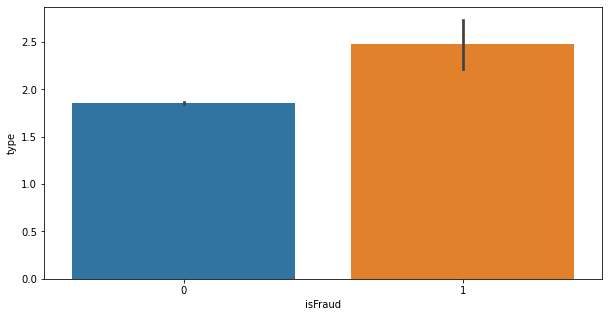

In [47]:
plt.figure(figsize = (10, 5))
sns.barplot(x = df['isFraud'], y = df['type'])
plt.show()

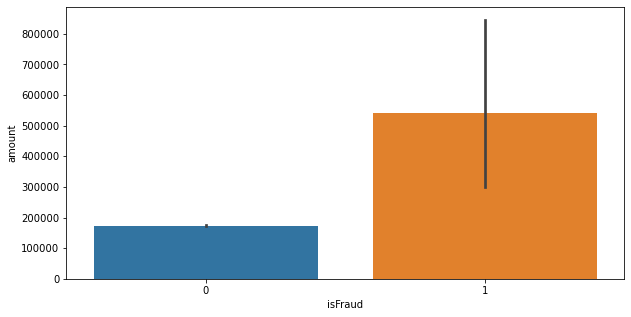

In [48]:
plt.figure(figsize = (10, 5))
sns.barplot(x = df['isFraud'], y = df['amount'])
plt.show()

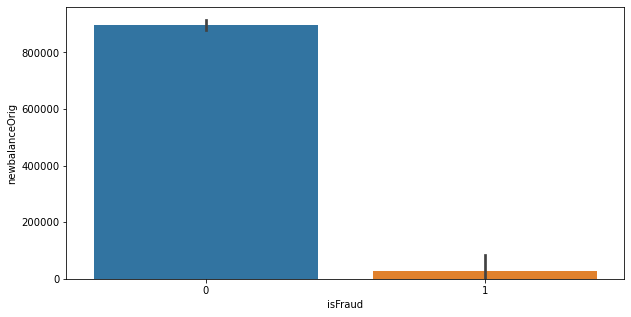

In [49]:
plt.figure(figsize = (10, 5))
sns.barplot(x = df['isFraud'], y = df['newbalanceOrig'])
plt.show()

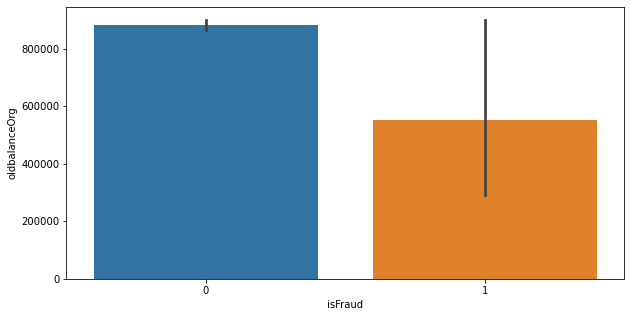

In [51]:
plt.figure(figsize = (10, 5))
sns.barplot(x = df['isFraud'], y = df['oldbalanceOrg'])
plt.show()

In [38]:
x = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [39]:
x

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,3,9839.64,11875,170136.0,160296.36,32022,0.00,0.00
1,1,3,1864.28,34403,21249.0,19384.72,33330,0.00,0.00
2,1,4,181.00,15659,181.0,0.00,9318,0.00,0.00
3,1,1,181.00,91930,181.0,0.00,8287,21182.00,0.00
4,1,3,11668.14,54134,41554.0,29885.86,16704,0.00,0.00
...,...,...,...,...,...,...,...,...,...
100160,10,0,61054.02,33962,11600000.0,11700000.00,9732,1054868.85,993814.83
100161,10,0,347608.07,51284,11700000.0,12000000.00,180,1814256.11,3246825.50
100162,10,0,68846.64,98901,12000000.0,12100000.00,8076,1622436.37,2287253.07
100163,10,0,48078.78,6250,12100000.0,12200000.00,9539,410069.03,161779.60


### train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

### Naivebayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
NB = GaussianNB()

In [43]:
model = NB.fit(x_train, y_train)

In [44]:
y_pred = model.predict(x_test)

### Accuracy_score

In [45]:
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9827284979783357

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     20008
           1       0.01      0.12      0.02        25

    accuracy                           0.98     20033
   macro avg       0.50      0.55      0.50     20033
weighted avg       1.00      0.98      0.99     20033

